In [ ]:
pip install pgmpy

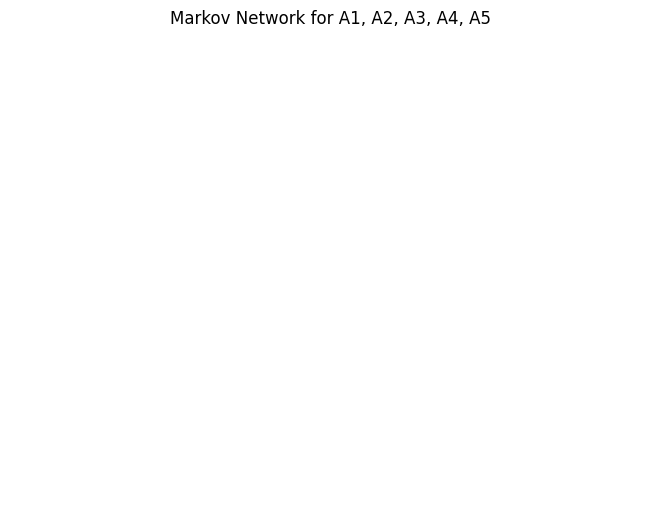

Clicile modelului:  [['A3', 'A4'], ['A3', 'A1'], ['A2', 'A5', 'A4'], ['A2', 'A1']]
Starea de probabilitate maximă (MAP): (1, 1, 1, 1, 1)
Probabilitatea maximă: 0.3652009941107978


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import MarkovModel
import itertools
import numpy as np

# a) modelul markov si graful retelei
def create_markov_model():
    model = MarkovModel()
#muchii conform descrierii
    edges = [("A1", "A2"), ("A1", "A3"),
             ("A2", "A4"), ("A2", "A5"),
             ("A3", "A4"),
             ("A4", "A5")]

    model.add_edges_from(edges)

#desen graf
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold", edge_color='gray')
    plt.title("Markov Network for A1, A2, A3, A4, A5")
    plt.show()

#determinam cliques
    cliques = list(nx.find_cliques(model))
    print("Clicile modelului: ", cliques)
    return cliques

#b) functia de potential energetic
def energy_potential(A, coefficients):
    """ functia de potential energetic pentru o clica """
    return np.exp(np.dot(coefficients, A))

#calcul probabilitatile comune + MAP
def calculate_joint_probabilities(cliques, coefficients):
    """ probabilitatile comune si starea de probabilitate maxima (MAP) """
    #toate combinațiile posibile de stari (binare) pentru variabilele A1, A2, A3, A4, A5
    states = list(itertools.product([0, 1], repeat=5))

    #functie de calcul probabilitatea comune pentru o stare data
    def joint_probability(state):
        A1, A2, A3, A4, A5 = state
        clique1 = [A1, A2, A3]
        clique2 = [A2, A4, A5]
        clique3 = [A3, A4]
        return (energy_potential(clique1, coefficients['clique1']) *
                energy_potential(clique2, coefficients['clique2']) *
                energy_potential(clique3, coefficients['clique3']))

    #calculam probabilitatile pentru toate starile posibile
    probabilities = [joint_probability(state) for state in states]

    #normalizare probabilitati
    total_prob = sum(probabilities)
    normalized_probabilities = [p / total_prob for p in probabilities]

    #starea cu probabilitate maxima (MAP)
    max_prob_index = np.argmax(normalized_probabilities)
    max_prob_state = states[max_prob_index]

    print("Starea de probabilitate maxima (MAP):", max_prob_state)
    print("Probabilitatea maxima:", max(normalized_probabilities))

#executie
if __name__ == "__main__":
#graful + clicile
    cliques = create_markov_model()

#definim coeficienții pentru fiecare clica
    coefficients = {
        'clique1': [1, 1, 1],  #clica {A1, A2, A3}
        'clique2': [1, 1, 1],  #clica {A2, A4, A5}
        'clique3': [1, 1]      #clica {A3, A4}
    }

    # Pas 2: Calculăm probabilitățile comune și MAP
    calculate_joint_probabilities(cliques, coefficients)